In [1]:
import numpy as np 
import pandas as pd 
from PIL import Image 
from sklearn.svm import SVC 
from sklearn import metrics 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
train_data = pd.read_csv(r'nagaoka_gc/train/train_data.csv')
test_data = pd.read_csv(r'nagaoka_gc/test/test_data.csv')
print(train_data.head(), '\n', test_data.head())

  File name  GC
0  08DE663C   0
1  08EE752D   1
2  08DE663D   0
3  08EE751D   1
4  08DE664B   0 
   File name  GC
0  08DE762D   0
1  08EE780C   1
2  08EE050C   0
3  08EE972C   1
4  08DE863C   0


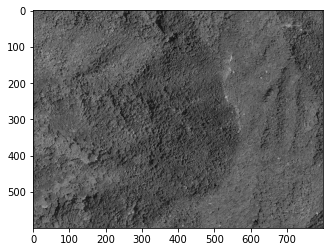

In [3]:
sample_img1 = Image.open(r'nagaoka_gc/train/08DE663C.jpg').convert(r'L')
plt.imshow(sample_img1, cmap=r'gray')

(600, 800)


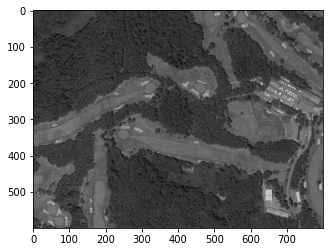

In [4]:
sample_img1 = Image.open(r'nagaoka_gc/train/08EE752D.jpg').convert(r'L')
plt.imshow(sample_img1, cmap=r'gray')
sample_img1_array = np.array(sample_img1)
print(sample_img1_array.shape)

In [5]:
# 訓練用の航空写真の読み込み
train_num = len(train_data)
# 左右、上下、180°回転させた画像を用意するため、4倍の容量の配列を用意する
X_train = np.empty(shape=(train_num * 4, 480000), dtype=np.uint8)
y_train = np.empty(shape=train_num*4, dtype=np.uint8)

for i in range(train_num):
    # 原画像をndarrayとして読み込んで訓練データに追加
    name = train_data.loc[i, r'File name']
    train_img = Image.open(r'nagaoka_gc/train/{0}.jpg'.format(name)).convert(r'L')
    train_img = np.array(train_img)
    train_img_f = train_img.flatten()
    X_train[i] = train_img_f
    y_train[i] = train_data.loc[i, r'GC']

    # 左右反転させたものを訓練データに追加
    train_img = np.fliplr(train_img)
    train_img_f = train_img.flatten()
    X_train[i + train_num] = train_img_f
    y_train[i + train_num] = train_data.loc[i, r'GC']

    # 上下反転させたものを訓練データに追加
    train_img = np.flipud(train_img)
    train_img_f = train_img.flatten()
    X_train[i + train_num * 2] = train_img_f
    y_train[i + train_num * 2] = train_data.loc[i, r'GC']

    # 180°回転させたものを訓練データに追加
    train_img = np.rot90(train_img, 2)
    train_img_f = train_img.flatten()
    X_train[i + train_num * 3] = train_img_f
    y_train[i + train_num * 3] = train_data.loc[i, r'GC']

In [6]:
# テスト用の航空写真の読み込み

# ndarrayのデータを保管する領域の確保
test_num = len(test_data)
X_test = np.empty((test_num, 480000), dtype=np.uint8)
y_test = np.empty(test_num, dtype=np.uint8)

# 画像ひとつひとつについて繰り返し処理
for i in range(test_num):

    # ndarrayとして読み込んで訓練データに追加
    name = test_data.loc[i, r'File name']
    test_img = Image.open(r'nagaoka_gc/test/{0}.jpg'.format(name)).convert(r'L')
    test_img = np.array(test_img)
    test_img_f = test_img.flatten()
    X_test[i] = test_img_f
    y_test[i] = test_data.loc[i, r'GC']

In [7]:
# 分類器の作成
classifier = SVC(kernel=r'linear', gamma=r'scale', random_state=1)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=1)

In [8]:
y_pred = classifier.predict(X_test)
print(y_pred)
print(y_test)
print(metrics.confusion_matrix(y_test, y_pred))

[0 0 0 1 0 1]
[0 1 0 1 0 1]
[[3 0]
 [1 2]]
